# Problem Statement

Using membership cards at a supermarket mall, you have some basic information about your customers, such as their ID, age, gender, annual income, and spending habits.

For the marketing team to plan strategy appropriately, they need to understand the customers, such as who the target customers are. The marketing team's main objective is to find meaningful clusters of customers based on their spending scores since they are the main factor for them.

The MLL customer data from Kaggle dataset is used for this purpose using an unsupervised machine learning algorithm namely k-means.

## 1. Import the required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 2. Reading the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2.1. Understanding the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# drop the ID that not relevant to the context
df.drop(['CustomerID'], axis = 1, inplace=True)

## 3. EDA

### 3.1. Visualize the distributions of the featurs
To do this, I visualize the relationship between the distributions of *age*, *annual income*, and *spending score* of the customers (diagonal) and their correlations.


<Figure size 300x300 with 0 Axes>

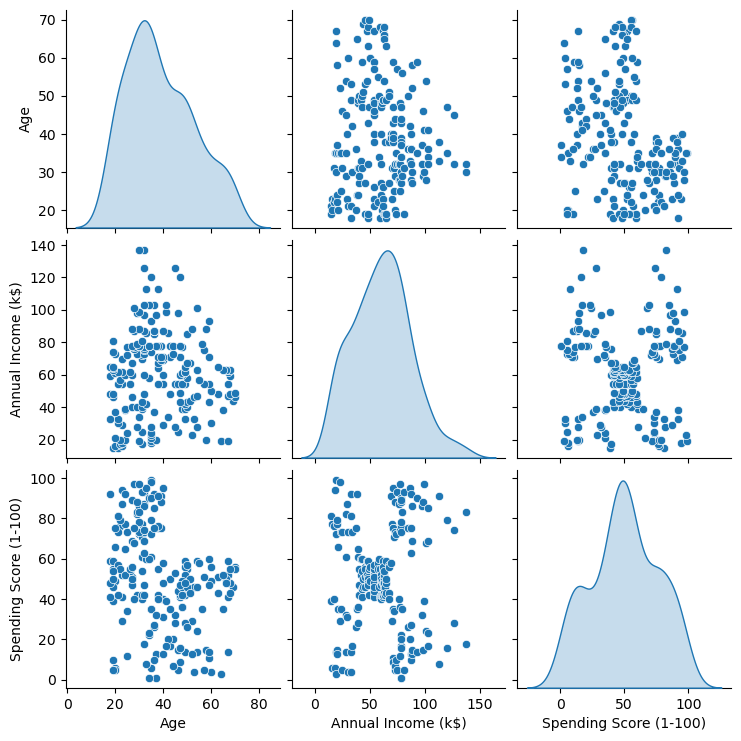

In [10]:
# Pairwise relationship between Variables of the Dataset
plt.figure(figsize=(3,3))
sns.pairplot(df,diag_kind='kde')
plt.show()

#### 3.1.1. Age and Gender


As you can see from the bar chart, we have more female samples than male samples.

According to the histogram, most mall visitors are between the ages of 20 and 35. In addition, the age distribution is skewed toward the younger age groups.

It is also interesting to look at age distribution with respect to gender of customers. According to the figure, the number of females in the younger age group is greater than the number of males. 

In order to better analyze the customer age groups, I divided them into several groups: 18-25, 26-35, 36-45, 46-55, 55+. According to the age group plot, 26-35 year old males and females make up the largest group of customers. 

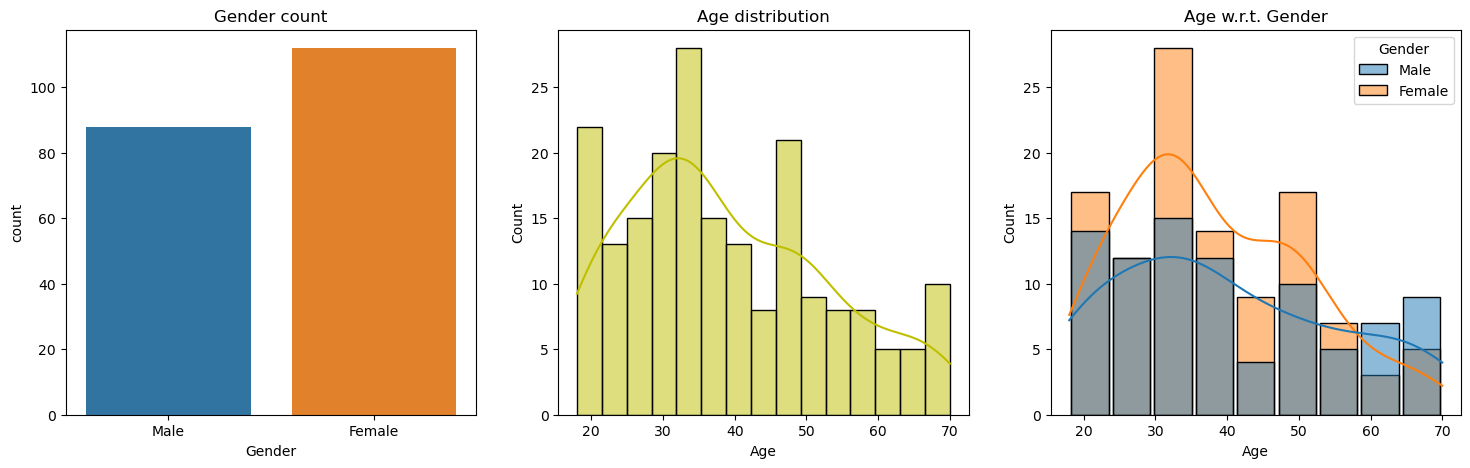

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18,5))

# Title and countplot for gender
ax[0].set_title('Gender count')
sns.countplot(data=df, x='Gender', ax=ax[0])

# Title and distribution plot for age
ax[1].set_title('Age distribution')
sns.histplot(df['Age'], color='y', bins=15, ax=ax[1], kde=True)

# Title and histogram plot for age with respect to gender
ax[2].set_title('Age w.r.t. Gender')
sns.histplot(data=df, x='Age', hue='Gender', shrink=.9, ax=ax[2], kde=True)

# Display the plots
plt.show()


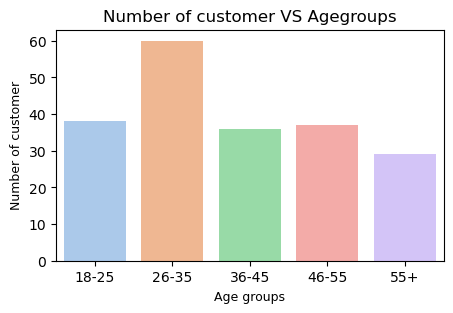

In [12]:
# Create different age groups
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55up = df.Age[df.Age >= 56]

# Create a list of age ranges and the number of customers in each range
age_range = ['18-25', '26-35', '36-45', '46-55', '55+']
len_age = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55up.values)]

# Create a figure with a size of 5x3
plt.figure(figsize=(5,3))

# Create a bar plot showing the number of customers in each age group
sns.barplot(x=age_range, y=len_age, palette='pastel')

# Set the title, x-axis label, and y-axis label of the plot
plt.title('Number of customer VS Agegroups', fontsize=12)
plt.xlabel('Age groups', fontsize=9)
plt.ylabel('Number of customer', fontsize=9)

# Display the resulting plot
plt.show()

#### 3.1.2. Annual Income, Spending Score, Gender


The histogram displaying the customers' annual income reveals a normal distribution, with no instances of annual incomes below 20k in the dataset. To gain a better understanding of the distribution of annual incomes, I divided them into several ranges, as illustrated in the chart. It shows that the majority of customers earn between 60k and 90k annually, while only a few earn over 120k.

Furthermore, I segmented the spending values into various groups, revealing that the 41-60 range is the most frequently occurring. Moreover, the two box plots demonstrate that the range of the spending score is greater than that of the annual income.

To examine how gender affects annual income and spending scores, I plotted a scatter plot of annual income against spending score for male and female customers. The scatter plot indicates that customers with annual incomes between 20k-40k and 80k-100k have higher spending scores. A significant number of customers have an annual income of 50k$ and a spending score of 50 (average annual income equates to average spending score). There appears to be no clear relationship between customers' gender and their annual income or spending scores.

Finally, I used two bar charts to compare males and females in terms of their annual income and spending scores. Females tend to earn slightly less than males, but they have marginally higher spending scores.


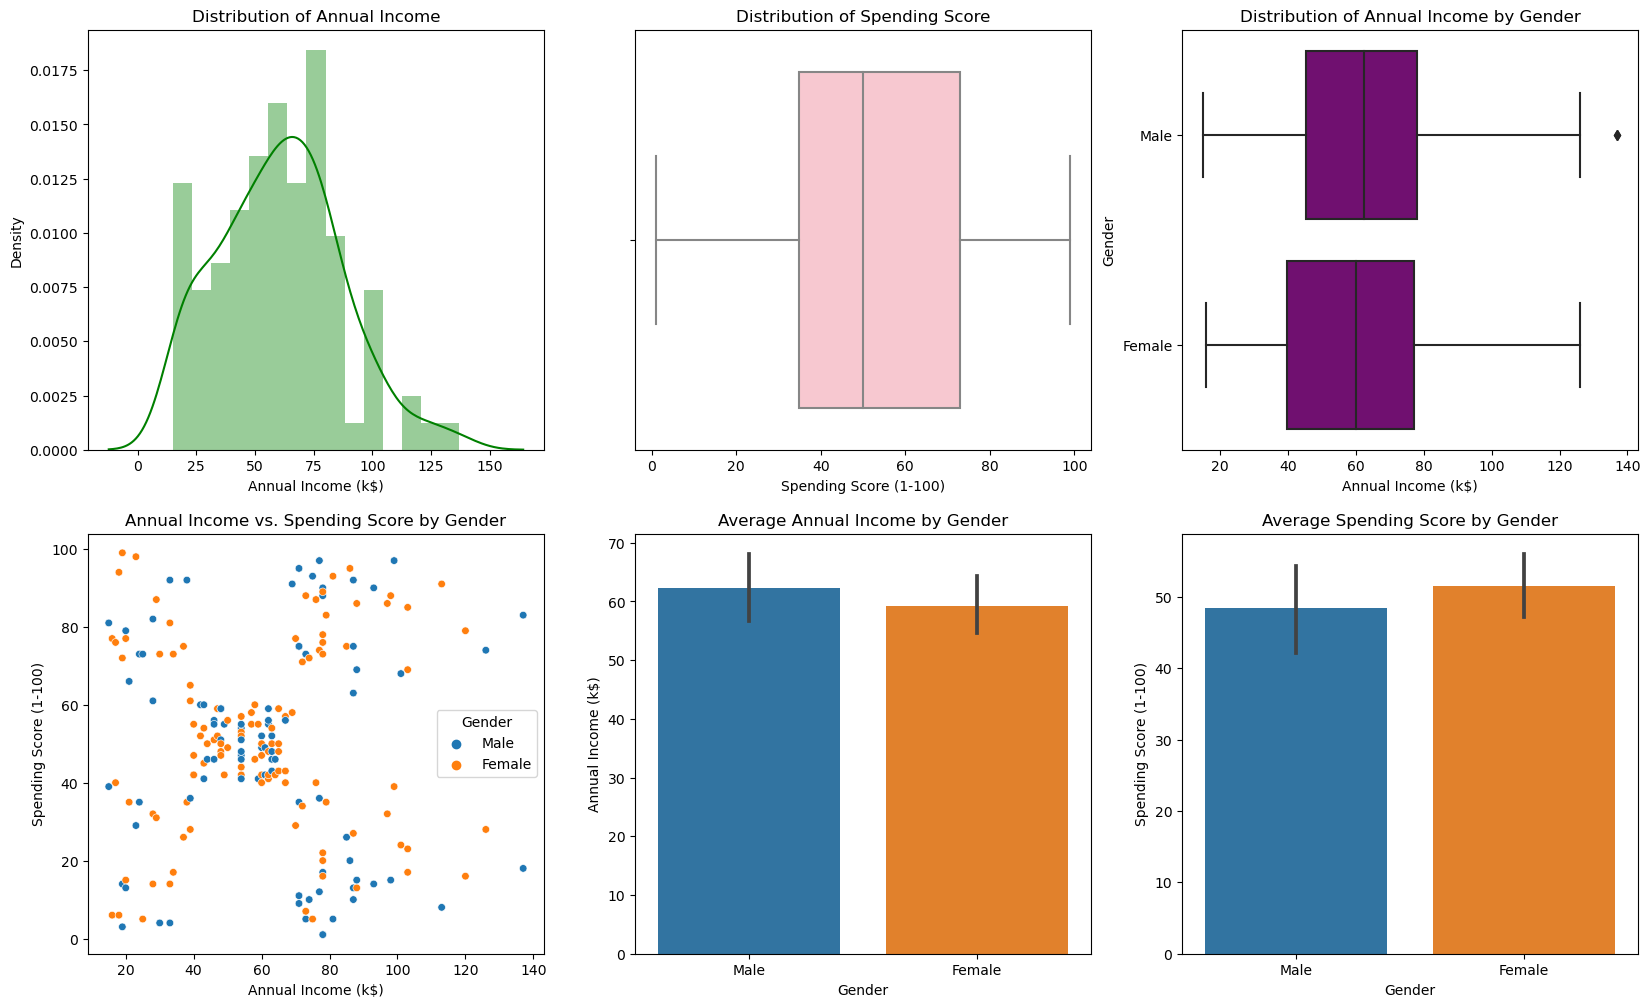

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots and figure size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Plot distribution of annual income
sns.distplot(df['Annual Income (k$)'], color='g', bins=15, ax=axs[0][0])
axs[0][0].set_title('Distribution of Annual Income')

# Plot distribution of spending score
sns.boxplot(x=df['Spending Score (1-100)'], color='pink', ax=axs[0][1])
axs[0][1].set_title('Distribution of Spending Score')

# Plot boxplot of annual income by gender
sns.boxplot(x='Annual Income (k$)', y='Gender', data=df, orient='h', color='purple', ax=axs[0][2])
axs[0][2].set_title('Distribution of Annual Income by Gender')

# Plot scatterplot of annual income vs. spending score by gender
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, s=30, ax=axs[1][0])
axs[1][0].set_title('Annual Income vs. Spending Score by Gender')

# Plot bar chart of average annual income by gender
sns.barplot(x='Gender', y='Annual Income (k$)', data=df, ax=axs[1][1])
axs[1][1].set_title('Average Annual Income by Gender')

# Plot bar chart of average spending score by gender
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axs[1][2])
axs[1][2].set_title('Average Spending Score by Gender')

# Display the plot
plt.show()


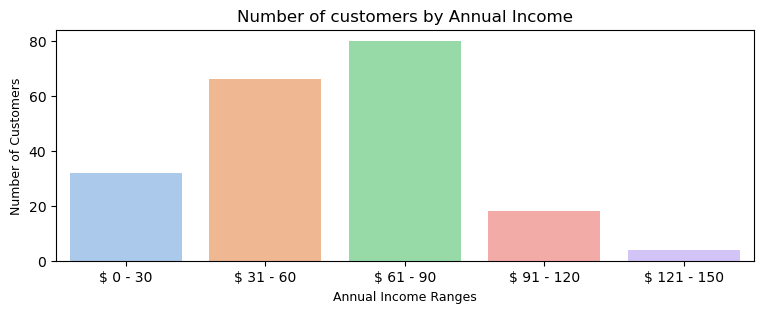

In [14]:
# Define income ranges and filter data accordingly
income_ranges = [(0,30), (31,60), (61,90), (91,120), (121,150)]
income_counts = []
for income_range in income_ranges:
    filtered_data = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= income_range[0]) & (df['Annual Income (k$)'] <= income_range[1])]
    income_counts.append(len(filtered_data))
    
# Plot bar chart using Seaborn
plt.figure(figsize=(9,3))
sns.barplot(x=['$ {} - {}'.format(r[0], r[1]) for r in income_ranges], y=income_counts, palette='pastel')
plt.title('Number of customers by Annual Income', fontsize=12)
plt.xlabel('Annual Income Ranges', fontsize=9)
plt.ylabel('Number of Customers', fontsize=9)
plt.show()

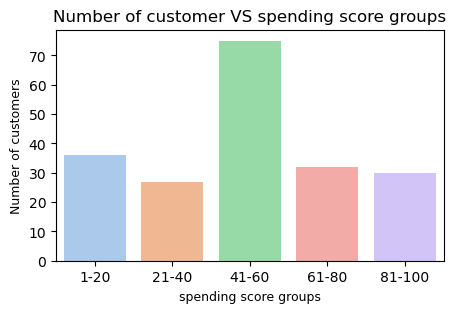

In [15]:
# Segment the Spending Score to undersatnd it better
# visualize the number of customers according to their spending scores. 

ss1_20  = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss81_100= df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

SSX = ['1-20', '21-40', '41-60', '61-80', '81-100']
SSY = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(5,3))
sns.barplot(x=SSX, y=SSY, palette='pastel')
plt.title('Number of customer VS spending score groups',fontsize=12)
plt.xlabel('spending score groups',fontsize=9)
plt.ylabel('Number of customers',fontsize=9)

plt.show()

### 3.2. Correlations between the numerical features
Based on the heatmap below, we can see that none of the features are correlated with each other.

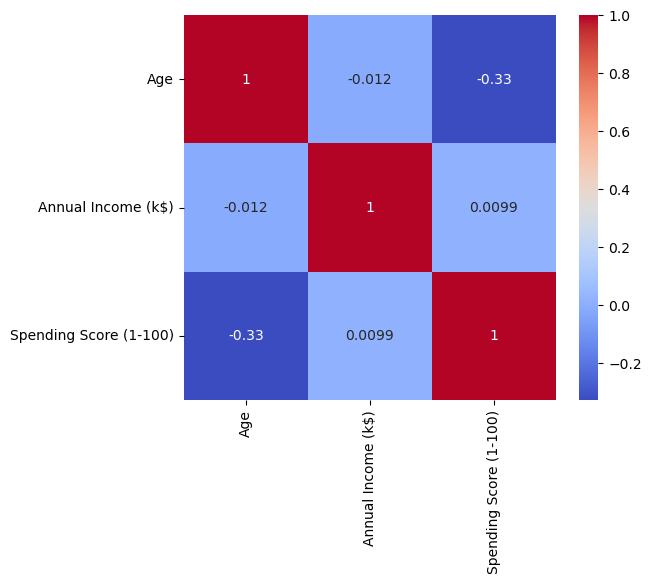

In [16]:
# Plotting the correlation of all the columns of the dataset.
corr = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, linecolor='black', cmap='coolwarm')
#plt.title('corr of all variables', fontsize=16)

plt.show()

## 4. Clustering 

In this step, I apply K-means clustering to the dataset considering the *spending score*, *annual income*, and *age* fields.

### 4.1. Elbow method based on inertia

My method for finding the optimal cluster number in a feature space is to use inertia, which measures the Within Cluster Sum Of Squares (WCSS), the distance between observations and the cluster centers. For a given number of clusters, the smaller the inertia, the better the clustering. The elbow graph plots the inertia against the number of clusters for different cluster numbers from 1 to 10. Based on the number of clusters on the x-axis, the elbow joint is the optimal cluster location. Based on the elbow graph, I will use the number 5 as the cluster number, since the value of WCSS decreases very slightly from this point on. This is the most relevant number of clusters.

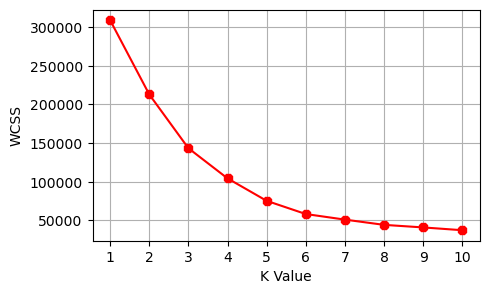

In [17]:
sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,1:])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(5,3))    
plt.grid()
plt.plot(range(1,11),sse, color='red', marker = '8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()


### 4.2. K-means clustering

In [18]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(df.iloc[:,1:])

df['label'] = clusters

### 4.3. Visualization and evaluation

To analyze the results, I plot the samples in a 3D plot and two 2D plots where the clusters are represented by different colors.
The 2D plots represent the annual incomes and ages versus the spending scores. As can be seen, the customers are segmented into 5 very distinct groups based on the annual income and spending scores, which is intuitive from the feature space, including

- High annual income (> 70k) and high spending score ( > 60) - Yellow
- High annual income (> 70k) and low spending score (< 40) - Blue
- Low annual income (< 40k) and high spending score (> 60) - Red
- Low annual income (< 40k) and low spending score (< 40) - Green
- Average annual income (40k < < 70k) and average spending score (40 < < 60) - Brown

In addition, when looking at Spending Scores and Age:

- Average annual income and average spending score group (Brown) spread across all ages
- The high annual income and low spending score group (blue) is spread across the age range, but more towards the younger age groups.
- The low annual income and low spending score group (green) is mostly over the age of 35.
- The low annual income and high spending score (red) group is mostly in their 20s.
- The high annual income and high spending score (yellow) group is between 25 and 40 years old.



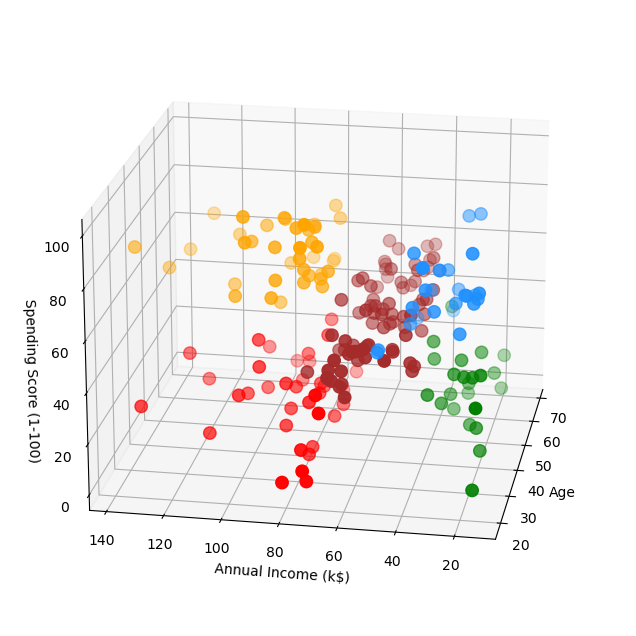

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='green', s=80)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='orange', s=80)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='brown', s=80)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='dodgerblue', s=80)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='red', s=80)

ax.view_init(20, 190)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<AxesSubplot:title={'center':'Spending Score VS Age'}, xlabel='Age', ylabel='Spending Score (1-100)'>

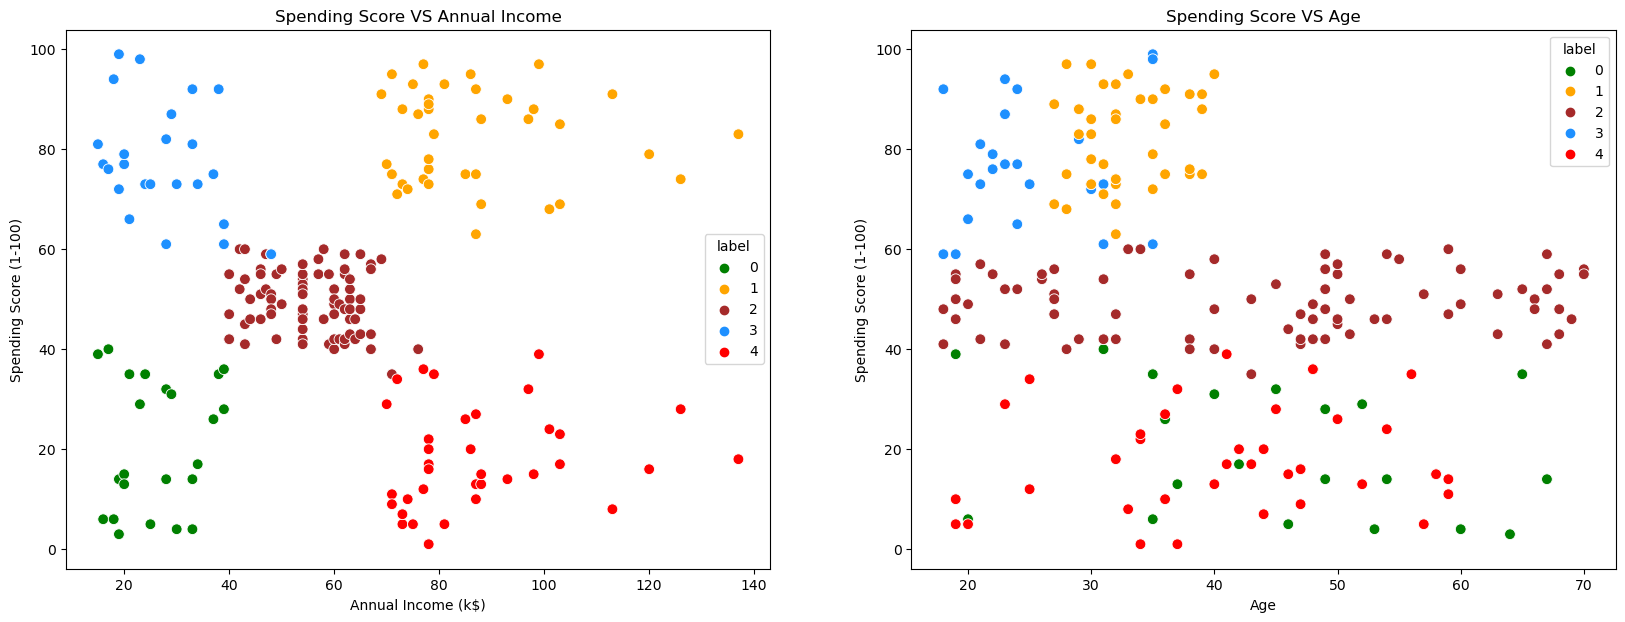

In [20]:
#Scatterplot of the clusters
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,7)
#plt.figure(figsize=(7,6))
ax[0].set_title('Spending Score VS Annual Income')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60, ax=ax[0] )

ax[1].set_title('Spending Score VS Age')
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60, ax=ax[1] )


## 5. Conclusion

Different customer groups can be targeted differently based on their characteristics. Yellow and red customers generate the most revenue and require loyalty programs or discounts in order to retain them. These are younger customers whose product preferences should also be taken into consideration. The blue and green groups may also benefit from acquisition strategies. Their different product preferences should be taken into account since they come from very different income groups.
